# Fatal Police Encounters in the US
****

## Topic 

The topic of this project is about the lives that have been taken away due to police
brutality in the US. This issue isn’t just a matter of health concerns and excessive force, it
involves racism and injustice. People of color, especially Black people, have been facing a
higher risk of being killed by the police than White people. The rate of death by police in the US
is concerningly high and occurs much more frequently than in other countries. 

This can no
longer be overlooked; it must be stopped. For too long, Black people in the US have been
unfairly treated at the hands of the criminal justice system and police brutality played a
significant role in this. 

> ### Why this topic?
People, including myself, need to be more aware and educated about this social issue. Black lives matter and society won’t change without any efforts.

> I desire to gain new knowledge and learn
the extent of how mistreated Black’s lives were, simply because of their skin color. I want to be
informed with the most recent data and facts about the police violence in the US and be more aware of this social issue. Having a greater sense of the seriousness of this concern is important and hopefully, this project will be used to further educate the people in my surroundings and others as well during these times.

## Research Question

What is the trend of the deaths from police
violence year-by-year from 2015 to 2020? 

In addition, were there any changes after the recent
George Floyd protests that began on the date May 26, 2020? 

> ### How is this relevant to the topic? 
It will provide data and insights on how racism and injustice are presented in
police violence. The trend of each year will display the level of how the polices in the US are
excessively using their force within each race. 


## Data Sources
The primary data source for the analysis is from [The Washington Post](https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv)
. It is a `.csv` file and includes the data of victims who have been killed by the police starting
from the beginning of the year 2015 to June 2020. 

It provides the ID, name of the victim, manner of death, whether they
were armed or not, age, gender, race, and more.
****

## Install and import

In [1]:
#!pip install wordcloud
!pip install wordcloud

In [2]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
from collections import Counter
from wordcloud import WordCloud

In [3]:
pwd

'/Users/pamelalee/Desktop/dh'

In [4]:
os.chdir("../police-brutality/data/")

## Import .csv files

In [109]:
victims = pd.read_csv("fatal-police.csv")
victims2015 = pd.read_csv("police-2015.csv")
victims2016 = pd.read_csv("police-2016.csv")
victims2017 = pd.read_csv("police-2017.csv")
victims2018 = pd.read_csv("police-2018.csv")
victims2019 = pd.read_csv("police-2019.csv")
victims2020 = pd.read_csv("police-2020.csv")

## Split date by year, month, and day

In [6]:
victims_2015['year']=[d.split('/')[2] for d in victims_2015.date]
victims_2015['month']=[d.split('/')[0] for d in victims_2015.date]
victims_2015['day']=[d.split('/')[1] for d in victims_2015.date]

victims_2016['year']=[d.split('/')[2] for d in victims_2016.date]
victims_2016['month']=[d.split('/')[0] for d in victims_2016.date]
victims_2016['day']=[d.split('/')[1] for d in victims_2016.date]

victims_2017['year']=[d.split('/')[2] for d in victims_2017.date]
victims_2017['month']=[d.split('/')[0] for d in victims_2017.date]
victims_2017['day']=[d.split('/')[1] for d in victims_2017.date]

victims_2018['year']=[d.split('/')[2] for d in victims_2018.date]
victims_2018['month']=[d.split('/')[0] for d in victims_2018.date]
victims_2018['day']=[d.split('/')[1] for d in victims_2018.date]

victims_2019['year']=[d.split('/')[2] for d in victims_2019.date]
victims_2019['month']=[d.split('/')[0] for d in victims_2019.date]
victims_2019['day']=[d.split('/')[1] for d in victims_2019.date]

victims_2020['year']=[d.split('/')[2] for d in victims_2020.date]
victims_2020['month']=[d.split('/')[0] for d in victims_2020.date]
victims_2020['day']=[d.split('/')[1] for d in victims_2020.date]


In [7]:
victims_2015

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,1/2/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,15,1,2
1,4,Lewis Lee Lembke,1/2/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,15,1,2
2,5,John Paul Quintero,1/3/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,15,1,3
3,8,Matthew Hoffman,1/4/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,15,1,4
4,9,Michael Rodriguez,1/4/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1133,Siolosega Velega-Nuufolau,12/29/15,shot,knife,50.0,F,O,Santa Nella,CA,True,other,Not fleeing,False,15,12,29
990,1134,Tien Hua,12/29/15,shot,unknown weapon,NaN,M,A,Rosemead,CA,False,undetermined,Not fleeing,False,15,12,29
991,1135,Fred Perez,12/30/15,shot,knife,55.0,M,H,Fresno,CA,False,attack,Not fleeing,True,15,12,30
992,1136,John Randell Veach,12/30/15,shot,undetermined,39.0,M,NaN,Rawlins,WY,False,undetermined,NaN,False,15,12,30


In [8]:
victims_2015.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'year', 'month', 'day'],
      dtype='object')

In [9]:
victims_2016

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,1139,Joshua Sisson,1/1/16,shot,knife,30.0,M,W,San Diego,CA,False,other,Not fleeing,True,16,1,1
1,1195,Lance Light,1/2/16,shot,gun,54.0,M,W,Maryneal,TX,False,attack,Car,False,16,1,2
2,1198,Lonnie Haskell Powers,1/2/16,shot,gun,37.0,M,W,Sioux Falls,SD,False,attack,Not fleeing,False,16,1,2
3,1138,Sean O'Brien,1/2/16,shot and Tasered,knife,37.0,M,W,Livingston,MT,False,other,Not fleeing,False,16,1,2
4,1140,Germonta Wallace,1/3/16,shot,gun,30.0,M,B,Charlotte,NC,False,attack,Not fleeing,False,16,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2182,TK TK,12/30/16,shot,gun,NaN,M,NaN,Pensacola,FL,False,attack,Not fleeing,False,16,12,30
958,2186,Dustin Selby,12/30/16,shot and Tasered,knife,31.0,M,NaN,Phoenix,AZ,False,other,Foot,False,16,12,30
959,2181,Ricky Whidden,12/31/16,shot,knife,46.0,M,W,Loxahatchee,FL,True,attack,Not fleeing,False,16,12,31
960,2183,Jason Michael Robison,12/31/16,shot,gun,32.0,M,W,Huntingdon County,PA,False,attack,Other,False,16,12,31


In [10]:
victims_2017

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,2177,John McLaughlin,1/1/17,shot,gun,42.0,M,W,Springfield,OH,False,other,Not fleeing,False,17,1,1
1,2178,Trevon Johnson,1/1/17,shot,knife,17.0,M,B,Villa Park,IL,True,other,Not fleeing,False,17,1,1
2,2184,Chad Erik Roberts,1/1/17,shot,gun,35.0,M,W,Woodstock,GA,False,attack,Car,False,17,1,1
3,2185,Juan Carlos Cuadra,1/1/17,shot,gun,23.0,M,H,Houston,TX,False,attack,Foot,False,17,1,1
4,2187,Mark Guirguis,1/1/17,shot,NaN,21.0,M,B,Allen,TX,False,attack,Car,False,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3255,Marco Antonio Carlos,12/30/17,shot,gun,31.0,M,H,Redwood City,CA,False,attack,Not fleeing,False,17,12,30
982,3257,Heath Wayne Hodges,12/30/17,shot,undetermined,36.0,M,W,Crowell,TX,False,undetermined,NaN,False,17,12,30
983,3260,Oscar Sandoval,12/30/17,shot,gun,39.0,M,NaN,Los Angeles,CA,False,other,Not fleeing,False,17,12,30
984,3254,Matthew Riehl,12/31/17,shot,gun,37.0,M,NaN,Highlands Ranch,CO,True,attack,Not fleeing,True,17,12,31


In [11]:
victims_2018

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,3275,Mark Steven Parkinson,1/1/18,shot,gun,65.0,M,W,Rossville,GA,True,attack,Not fleeing,False,18,1,1
1,3288,Archie Lawhon III,1/1/18,shot,gun,42.0,M,W,Romance,AR,False,attack,Not fleeing,False,18,1,1
2,3289,Gary Johns,1/1/18,shot,gun,65.0,M,W,Edgewater,FL,True,attack,Not fleeing,True,18,1,1
3,3291,Shana Diane Musquiz,1/2/18,shot,gun,30.0,F,W,Camp Wood,TX,False,attack,Not fleeing,False,18,1,2
4,3292,Ronald Elliot,1/2/18,shot,gun,49.0,M,W,Ozark,AR,True,attack,Not fleeing,False,18,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,4411,Paul Arbitelle,12/30/18,shot and Tasered,knife,45.0,M,W,Danbury,CT,False,other,Not fleeing,False,18,12,30
986,4332,Iosia Faletogo,12/31/18,shot,gun,36.0,M,A,Seattle,WA,False,attack,Foot,True,18,12,31
987,4335,Matthew Hurley,12/31/18,shot,gun,45.0,M,W,Fort Dodge,IA,False,attack,Car,False,18,12,31
988,4337,Jesus Ramos,12/31/18,shot,undetermined,34.0,M,H,Longmont,CO,True,other,Foot,False,18,12,31


In [12]:
victims_2019

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,4334,Dylan Michael Smith,1/1/19,shot,gun,26.0,M,W,Davidson County,NC,False,attack,Foot,False,19,1,1
1,4504,Brandon Lovell Webster,1/1/19,shot,vehicle,28.0,M,B,Shallotte,NC,False,other,Car,False,19,1,1
2,4342,Matthew Burroughs,1/2/19,shot,vehicle,35.0,M,B,Niles,OH,False,attack,Foot,False,19,1,2
3,4343,Abdoulaye Thiam,1/2/19,shot,knife,20.0,M,B,Whitehaven,TN,False,other,Not fleeing,True,19,1,2
4,4345,Arron Thomas Lambert,1/2/19,shot,Taser,33.0,M,W,San Antonio,TX,False,attack,Other,False,19,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5333,Frederick Perkins,12/31/19,shot,vehicle,37.0,M,B,Chesterfield,MO,False,attack,Car,False,19,12,31
995,5345,Dedrick Thomas,12/31/19,shot,gun,NaN,M,B,Forrest City,AR,False,attack,NaN,False,19,12,31
996,5358,Malik Williams,12/31/19,shot,gun,23.0,M,B,Federal Way,WA,False,attack,Not fleeing,False,19,12,31
997,5359,Terry Hudson,12/31/19,shot,gun,57.0,M,B,Omaha,NE,False,attack,Not fleeing,True,19,12,31


In [13]:
victims_2020

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,5344,Derrick A. Elseth,1/1/20,shot,gun,24.0,M,W,Richmond County,VA,False,other,Not fleeing,False,20,1,1
1,5347,Teddy James Maverick Varner,1/1/20,shot,gun,29.0,M,NaN,Central Point,OR,True,attack,Not fleeing,True,20,1,1
2,5403,Gerardo Antonio Conchas-Bustas,1/1/20,shot,knife,20.0,M,O,Denver,CO,False,attack,Not fleeing,True,20,1,1
3,5342,Gabriel Strickland,1/1/20,shot and Tasered,toy weapon,25.0,M,W,Grass Valley,CA,True,attack,Not fleeing,False,20,1,1
4,5339,Jeffery Dale Millsap,1/2/20,shot,gun,26.0,M,W,Holt,MO,False,attack,Car,False,20,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,5942,TK TK,6/24/20,shot,gun,NaN,F,A,Lake Forest,CA,False,other,Not fleeing,False,20,6,24
494,5946,TK TK,6/25/20,shot,knife,NaN,F,NaN,Plano,TX,False,attack,Not fleeing,False,20,6,25
495,5948,Robert D'Lon Harris,6/25/20,shot,undetermined,34.0,M,B,Vinita,OK,False,undetermined,Not fleeing,False,20,6,25
496,5949,Martin Humberto Sanchez Fregoso,6/25/20,shot,gun,37.0,M,H,Atlanta,GA,False,attack,Other,False,20,6,25


In [14]:
death_2015 = victims_2015["manner_of_death"].value_counts()
death_2016 = victims_2016["manner_of_death"].value_counts()
death_2017 = victims_2017["manner_of_death"].value_counts()
death_2018 = victims_2018["manner_of_death"].value_counts()
death_2019 = victims_2019["manner_of_death"].value_counts()
death_2020 = victims_2020["manner_of_death"].value_counts()


print(death_2015)
print(death_2016)
print(death_2017)
print(death_2018)
print(death_2019)
print(death_2020)

shot                926
shot and Tasered     68
Name: manner_of_death, dtype: int64
shot                900
shot and Tasered     62
Name: manner_of_death, dtype: int64
shot                935
shot and Tasered     51
Name: manner_of_death, dtype: int64
shot                959
shot and Tasered     31
Name: manner_of_death, dtype: int64
shot                961
shot and Tasered     38
Name: manner_of_death, dtype: int64
shot                476
shot and Tasered     22
Name: manner_of_death, dtype: int64


In [15]:
armed_2015 = victims_2015["armed"].value_counts()
armed_2016 = victims_2016["armed"].value_counts()
armed_2017 = victims_2017["armed"].value_counts()
armed_2018 = victims_2018["armed"].value_counts()
armed_2019 = victims_2019["armed"].value_counts()
armed_2020 = victims_2020["armed"].value_counts()


print(armed_2015)
print(armed_2016)
print(armed_2017)
print(armed_2018)
print(armed_2019)
print(armed_2020)

gun                                 563
knife                               138
unarmed                              94
toy weapon                           43
undetermined                         27
machete                               8
box cutter                            7
unknown weapon                        6
sword                                 6
metal pipe                            4
hammer                                4
Taser                                 3
guns and explosives                   3
hatchet                               2
crossbow                              2
blunt object                          2
screwdriver                           2
metal stick                           2
beer bottle                           1
sharp object                          1
baseball bat and fireplace poker      1
cordless drill                        1
flagpole                              1
shovel                                1
chain                                 1


In [16]:
gender_2015 = victims_2015["gender"].value_counts()
gender_2016 = victims_2016["gender"].value_counts()
gender_2017 = victims_2017["gender"].value_counts()
gender_2018 = victims_2018["gender"].value_counts()
gender_2019 = victims_2019["gender"].value_counts()
gender_2020 = victims_2020["gender"].value_counts()


print(gender_2015)
print(gender_2016)
print(gender_2017)
print(gender_2018)
print(gender_2019)
print(gender_2020)

M    952
F     42
Name: gender, dtype: int64
M    922
F     40
Name: gender, dtype: int64
M    940
F     45
Name: gender, dtype: int64
M    938
F     52
Name: gender, dtype: int64
M    956
F     43
Name: gender, dtype: int64
M    479
F     18
Name: gender, dtype: int64


In [17]:
race_2015 = victims_2015["race"].value_counts()
race_2016 = victims_2016["race"].value_counts()
race_2017 = victims_2017["race"].value_counts()
race_2018 = victims_2018["race"].value_counts()
race_2019 = victims_2019["race"].value_counts()
race_2020 = victims_2020["race"].value_counts()

race = victims["race"].value_counts()

print(race_2015)
print(race_2016)
print(race_2017)
print(race_2018)
print(race_2019)
print(race_2020)



W    497
B    258
H    172
O     15
A     14
N      9
Name: race, dtype: int64
W    468
B    234
H    160
N     16
A     15
O     11
Name: race, dtype: int64
W    459
B    224
H    179
N     22
A     16
O      6
Name: race, dtype: int64
W    454
B    228
H    165
A     21
N     15
O      4
Name: race, dtype: int64
W    403
B    250
H    162
A     19
N     13
O      9
Name: race, dtype: int64
W    197
B    105
H     66
A      9
O      3
N      3
Name: race, dtype: int64


In [19]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),                   
                   columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [20]:
d = {“year” :[2015, 2016, 2017, 2018, 2019, 2020], “race”: [2, 3, 4, 5, 6, 7]}
df = pd.DataFrame(data=d)
df

SyntaxError: invalid character in identifier (<ipython-input-20-d96eca5377ef>, line 1)

In [21]:
r_15 = victims_2015.groupby("race").count().merge(victims_2016).groupby("race").count(), on = "race")
r_15

SyntaxError: invalid syntax (<ipython-input-21-3d1bfe223a13>, line 1)

In [22]:
cones = Table().with_columns('Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25))
cones


NameError: name 'Table' is not defined

In [ ]:
victims_2015.groupby('race').count()

In [ ]:
r5 = victims_2015.groupby('race')['race'].count()
r6 = victims_2016.groupby('race')['race'].count()
r7 = victims_2017.groupby('race')['race'].count()

print(r5)
print(r6)
print(r7)

In [ ]:
v = victims_2015.loc[:,['race']]
v

In [23]:
victims_2015.loc[:,['race']].groupby('race')

In [24]:
victims_2015.loc[:,['race']].groupby('race').count()

""
race
A
B
H
N
O
W


In [34]:
data1 = victims_2015.loc[:,['race']]
data2 = pd.value_counts(data1.race).to_frame().reset_index()

data2.rename(columns={"index":"race", "race":2015})

data2

,index,race
0,W,497
1,B,258
2,H,172
3,O,15
4,A,14
5,N,9


In [113]:
data1 = victims2015.loc[:,['race']]
data2 = pd.value_counts(data1.race).to_frame().reset_index()

data3 = victims2016.loc[:,['race']]
data4 = pd.value_counts(data3.race).to_frame().reset_index()

data5 = victims2017.loc[:,['race']]
data6 = pd.value_counts(data5.race).to_frame().reset_index()

data7 = victims2018.loc[:,['race']]
data8 = pd.value_counts(data7.race).to_frame().reset_index()

data9 = victims2019.loc[:,['race']]
data10 = pd.value_counts(data9.race).to_frame().reset_index()

data11 = victims2020.loc[:,['race']]
data12 = pd.value_counts(data11.race).to_frame().reset_index()


In [114]:
merging1 = pd.merge(data2, data4, on = 'index')
merging2 = pd.merge(merging1, data6, on = 'index')
merging3 = pd.merge(merging2, data8, on = 'index')
merging4 = pd.merge(merging3, data10, on = 'index')
merging5 = pd.merge(merging4, data12, on = 'index')

del

merging5

SyntaxError: invalid syntax (<ipython-input-114-ba4fe3687f9b>, line 7)

,race,2015,2016,2017,2018,2019,2020
0,W,497,468,459,454,403,197
1,B,258,234,224,228,250,105
2,H,172,160,179,165,162,66
3,O,15,11,6,4,9,3
4,A,14,15,16,21,19,9
5,N,9,16,22,15,13,3


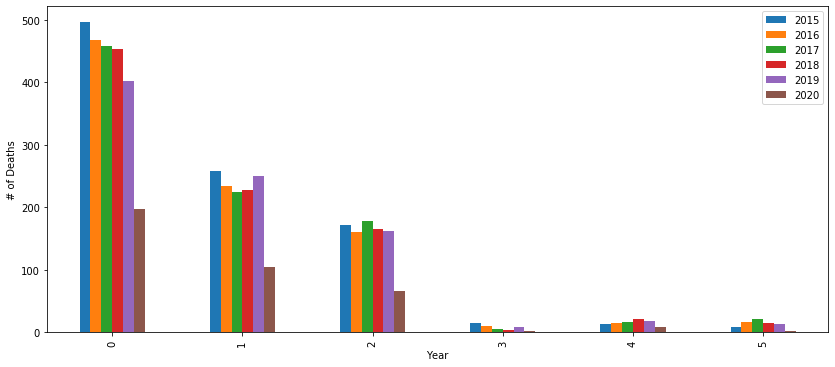

In [115]:
merging5.columns = ["race",2015,2016,2017,2018,2019,2020]
merging5.transpose()

merging5.plot(kind='bar', figsize = (14, 6))


plt.xlabel('Year')
plt.ylabel('# of Deaths')

merging5

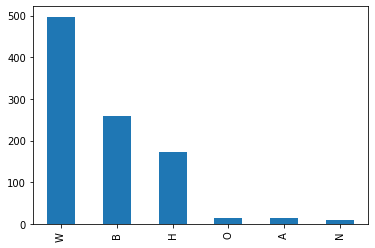

In [28]:
race_2015.plot(kind='bar');

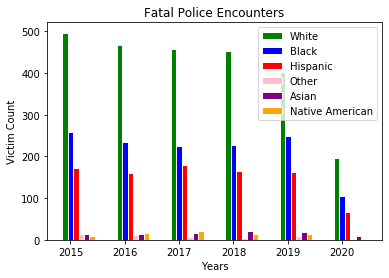

In [111]:
W_victims_2020= len(victims2020[victims2020["race"]=="W"])
W_victims_2019= len(victims2019[victims2019["race"]=="W"])
W_victims_2018= len(victims2018[victims2018["race"]=="W"])
# Divide by the population percentage

W_victims_2020= (len(victims2020[victims2020["race"]=="W"]))/0.601
W_victims_2019= (len(victims2019[victims2019["race"]=="W"]))/0.601
W_victims_2018= (len(victims2018[victims2018["race"]=="W"]))/0.601
W_victims_2017= (len(victims2017[victims2017["race"]=="W"]))/0.601
W_victims_2016= (len(victims2016[victims2016["race"]=="W"]))/0.601
W_victims_2015= (len(victims2015[victims2015["race"]=="W"]))/0.601

B_victims_2020= (len(victims2020[victims2020["race"]=="B"]))/0.134
B_victims_2019= (len(victims2019[victims2019["race"]=="B"]))/0.134
B_victims_2018= (len(victims2018[victims2018["race"]=="B"]))/0.134
B_victims_2017= (len(victims2017[victims2017["race"]=="B"]))/0.134
B_victims_2016= (len(victims2016[victims2016["race"]=="B"]))/0.134
B_victims_2015= (len(victims2015[victims2015["race"]=="B"]))/0.134

H_victims_2020= (len(victims2020[victims2020["race"]=="H"]))/0.185
H_victims_2019= (len(victims2019[victims2019["race"]=="H"]))/0.185
H_victims_2018= (len(victims2018[victims2018["race"]=="H"]))/0.185
H_victims_2017= (len(victims2017[victims2017["race"]=="H"]))/0.185
H_victims_2016= (len(victims2016[victims2016["race"]=="H"]))/0.185
H_victims_2015= (len(victims2015[victims2015["race"]=="H"]))/0.185

O_victims_2020= (len(victims2020[victims2020["race"]=="O"]))/0.019
O_victims_2019= (len(victims2019[victims2019["race"]=="O"]))/0.019
O_victims_2018= (len(victims2018[victims2018["race"]=="O"]))/0.019
O_victims_2017= (len(victims2017[victims2017["race"]=="O"]))/0.019
O_victims_2016= (len(victims2016[victims2016["race"]=="O"]))/0.019
O_victims_2015= (len(victims2015[victims2015["race"]=="O"]))/0.019

A_victims_2020= (len(victims2020[victims2020["race"]=="A"]))/0.059
A_victims_2019= (len(victims2019[victims2019["race"]=="A"]))/0.059
A_victims_2018= (len(victims2018[victims2018["race"]=="A"]))/0.059
A_victims_2017= (len(victims2017[victims2017["race"]=="A"]))/0.059
A_victims_2016= (len(victims2016[victims2016["race"]=="A"]))/0.059
A_victims_2015= (len(victims2015[victims2015["race"]=="A"]))/0.059

N_victims_2020= (len(victims2020[victims2020["race"]=="N"]))/0.002
N_victims_2019= (len(victims2019[victims2019["race"]=="N"]))/0.002
N_victims_2018= (len(victims2018[victims2018["race"]=="N"]))/0.002
N_victims_2017= (len(victims2017[victims2017["race"]=="N"]))/0.002
N_victims_2016= (len(victims2016[victims2016["race"]=="N"]))/0.002
N_victims_2015= (len(victims2015[victims2015["race"]=="N"]))/0.002

barWidth = 0.1

W_Victims = [W_victims_2015,W_victims_2016,W_victims_2017,W_victims_2018,W_victims_2019, W_victims_2020]
B_Victims = [B_victims_2015,B_victims_2016,B_victims_2017,B_victims_2018,B_victims_2019, B_victims_2020]
H_Victims = [H_victims_2015,H_victims_2016,H_victims_2017,H_victims_2018,H_victims_2019, H_victims_2020]
O_Victims = [O_victims_2015,O_victims_2016,O_victims_2017,O_victims_2018,O_victims_2019, O_victims_2020]
A_Victims = [A_victims_2015,A_victims_2016,A_victims_2017,A_victims_2018,A_victims_2019, A_victims_2020]
N_Victims = [N_victims_2015,N_victims_2016,N_victims_2017,N_victims_2018,N_victims_2019, N_victims_2020]


# Set position of bar on X axis
r1 = np.arange(len(W_Victims))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Make the plot
plt.bar(r1, W_Victims, color='green', width=barWidth, edgecolor='white', label='White')
plt.bar(r2, B_Victims, color='blue', width=barWidth, edgecolor='white', label='Black')
plt.bar(r3, H_Victims, color='red', width=barWidth, edgecolor='white', label='Hispanic') 
plt.bar(r4, O_Victims, color='pink', width=barWidth, edgecolor='white', label='Other') 
plt.bar(r5, A_Victims, color='purple', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r6, N_Victims, color='orange', width=barWidth, edgecolor='white', label='Native American')

# Add xticks on the middle of the group bars
plt.xlabel('Years')
plt.ylabel('Victim Count')
plt.xticks([r + barWidth for r in range(len(W_Victims))], ['2015', '2016', '2017', '2018', '2019','2020'])
 
# Create legend & Show graphic
plt.title('Fatal Police Encounters')
plt.legend()
plt.show()